# Credit Classification Model: Comparative Analysis of Supervised Learning Algorithms

By: Vishal Tyagi

In [36]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest
from sklearn.model_selection import train_test_split

data source: https://archive.ics.uci.edu/dataset/143/statlog+australian+credit+approval

In [37]:
# Feature metadata: maps column index to (name, type, original_label)
FEATURE_METADATA = {
    0: ('A1', 'categorical', 'a,b'),
    1: ('A2', 'numerical', 'continuous'),
    2: ('A3', 'numerical', 'continuous'),
    3: ('A4', 'categorical', 'p,g,gg'),
    4: ('A5', 'categorical', 'ff,d,i,k,j,aa,m,c,w,e,q,r,cc,x'),
    5: ('A6', 'categorical', 'ff,dd,j,bb,v,n,o,h,z'),
    6: ('A7', 'numerical', 'continuous'),
    7: ('A8', 'categorical', 't,f'),
    8: ('A9', 'categorical', 't,f'),
    9: ('A10', 'numerical', 'continuous'),
    10: ('A11', 'categorical', 't,f'),
    11: ('A12', 'categorical', 's,g,p'),
    12: ('A13', 'numerical', 'continuous'),
    13: ('A14', 'numerical', 'continuous'),
}

NUMERICAL_FEATURES = [name for idx, (name, ftype, _) in FEATURE_METADATA.items() if ftype == 'numerical']
CATEGORICAL_FEATURES = [name for idx, (name, ftype, _) in FEATURE_METADATA.items() if ftype == 'categorical']


In [38]:
import os
os.getcwd()

'c:\\Users\\dell\\credit-approval-classification\\notebooks'

In [39]:
# Read the dataset
df= pd.read_csv('..\\data\\raw\\australian.dat', sep=r'\s+', header=None)
# Rename columns as per description of each column name
col_names = [FEATURE_METADATA[i][0] for i in range(len(df.columns) - 1)] + ['A15_target']
df.columns = col_names
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15_target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [40]:
df.shape

(690, 15)


## Overview
- **Rows**: 690 credit applications
- **Columns**: 15 (14 predictors + 1 binary target)
- **Target (A15)**: 1 = Approved (+), 2 = Denied (-)
- **Features**: 6 numerical + 8 categorical (coded as integers)


In [41]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A1          690 non-null    int64  
 1   A2          690 non-null    float64
 2   A3          690 non-null    float64
 3   A4          690 non-null    int64  
 4   A5          690 non-null    int64  
 5   A6          690 non-null    int64  
 6   A7          690 non-null    float64
 7   A8          690 non-null    int64  
 8   A9          690 non-null    int64  
 9   A10         690 non-null    int64  
 10  A11         690 non-null    int64  
 11  A12         690 non-null    int64  
 12  A13         690 non-null    int64  
 13  A14         690 non-null    int64  
 14  A15_target  690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


## Data Quality
- No missing values in the provided file; each column contains 690 non-null entries.
- Column types: 6 numerical (continuous) and 8 categorical (integer-coded), plus 1 target.

In [42]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15_target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## Feature Breakdown

### Numerical Features (6)
- **A2**: Continuous metric (mean ≈ 31.6, range 13.75–80.25) — possibly age or income measure
- **A3**: Continuous metric (median 2.75, right-skewed, max 28)
- **A7**: Continuous metric (mean ≈ 2.22, heavy tail; max 28.5) — outliers present; candidate for log/box-cox transform
- **A10**: Continuous metric (median 0, sparse) — months or duration
- **A13**: Continuous metric (mean ≈ 184, wide range 0–2000) — credit line or account balance
- **A14**: Continuous metric (mean ≈ 1018, extreme outliers; max 100001) — likely monetary; requires winsorization or log-transform

## Exploratory Data Analysis

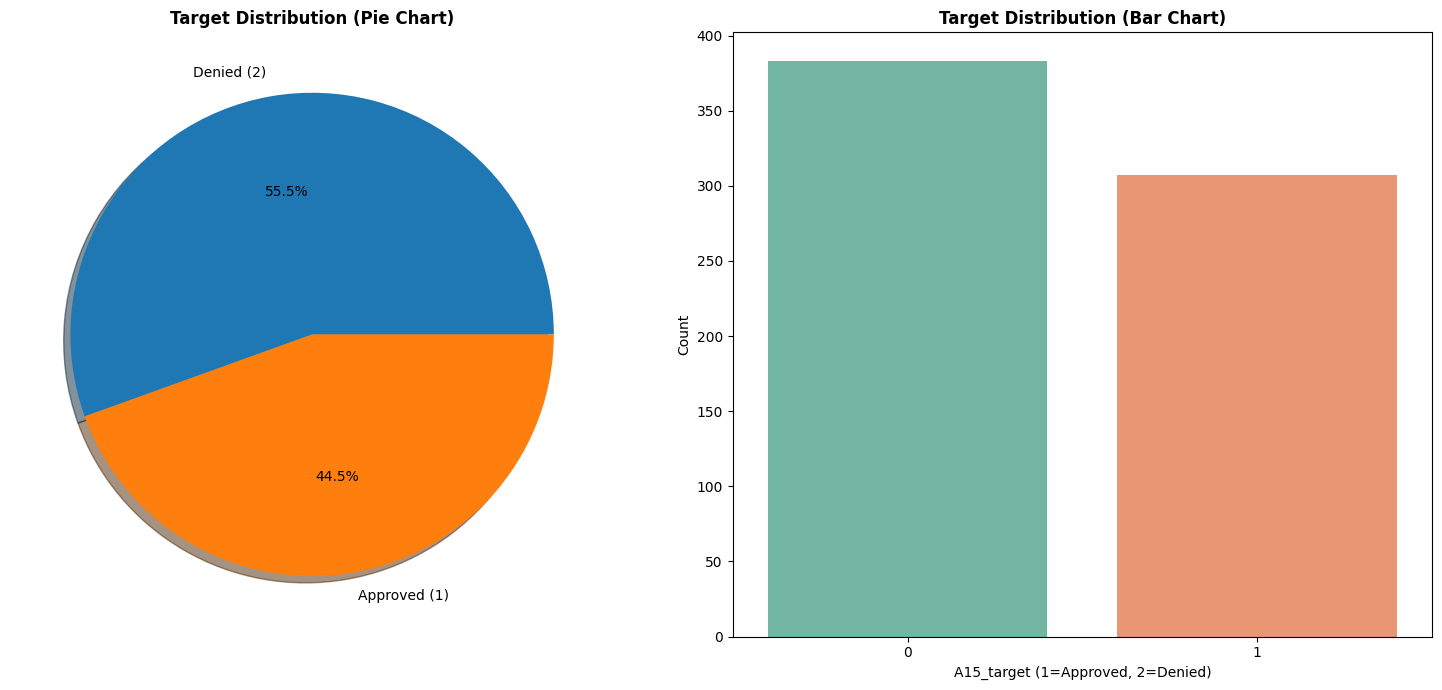

In [43]:
# Class Ratio - Target Variable Distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Pie chart
df['A15_target'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, labels=['Denied (2)', 'Approved (1)'])
ax[0].set_ylabel('')
ax[0].set_title('Target Distribution (Pie Chart)', fontsize=12, fontweight='bold')

# Count plot
sns.countplot(data=df, x='A15_target', ax=ax[1], palette='Set2')
ax[1].set_title('Target Distribution (Bar Chart)', fontsize=12, fontweight='bold')
ax[1].set_xlabel('A15_target (1=Approved, 2=Denied)', fontsize=10)
ax[1].set_ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

## Target Variable (A15)
- **Counts**: 1 (Approved) = 307 (~44%), 2 (Denied) = 383 (~56%)
- **Class Imbalance**: Modest (44/56 split). Use stratified splits and consider class weighting for modeling.

### Univariate Analysis

#### a. Numerical Features

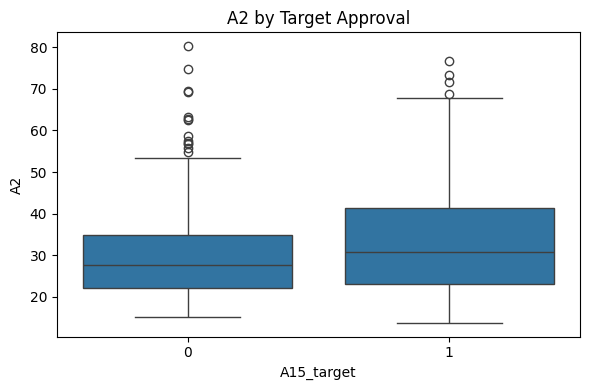

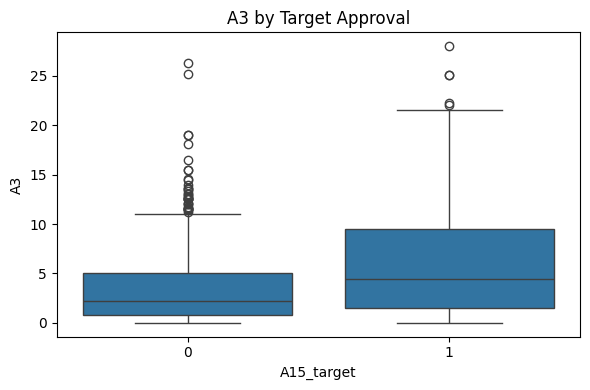

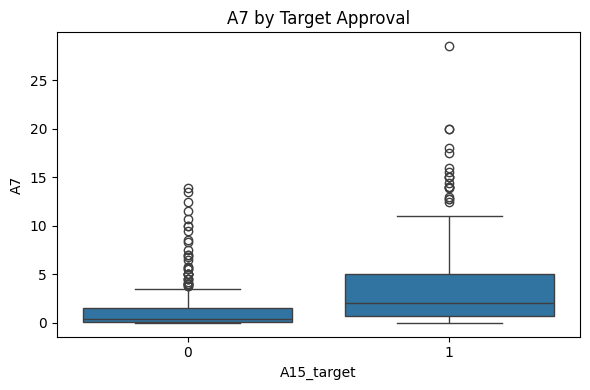

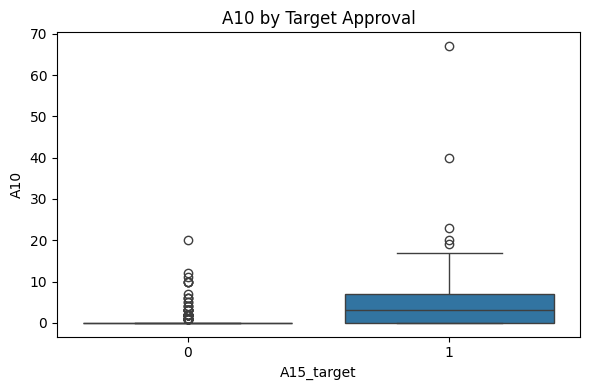

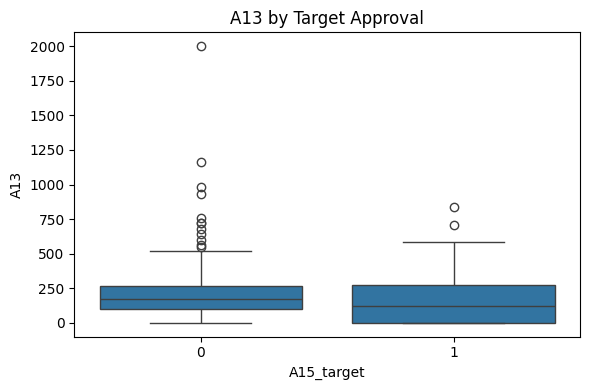

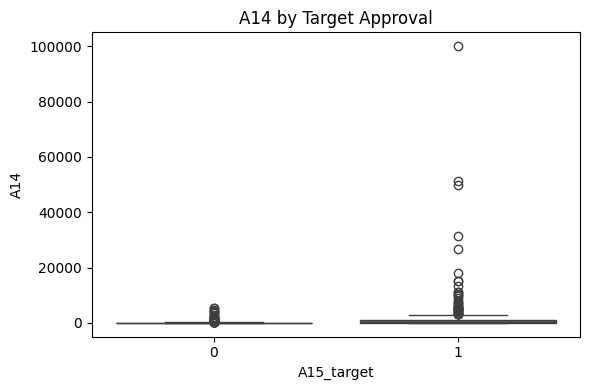

In [44]:
for feat in NUMERICAL_FEATURES:
    if feat in df.columns:
        # Histogram with KDE
        plt.figure(figsize=(6, 4))
        sns.histplot(df[feat], kde=True, bins=30)
        plt.title(f'Distribution: {feat}')
        plt.tight_layout()
        plt.close()

        # Boxplot by target
        plt.figure(figsize=(6, 4))
        sns.boxplot(x='A15_target', y=feat, data=df)
        plt.title(f'{feat} by Target Approval')
        plt.tight_layout()

#### b. Categorical Features

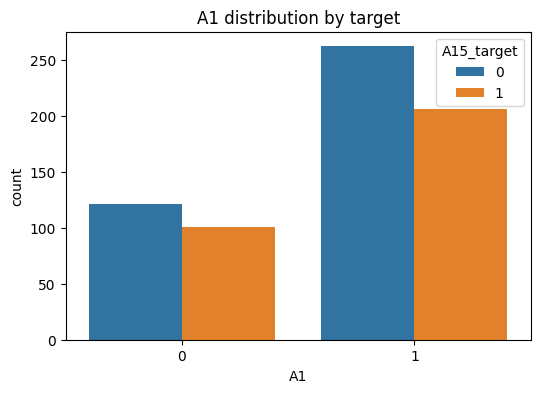

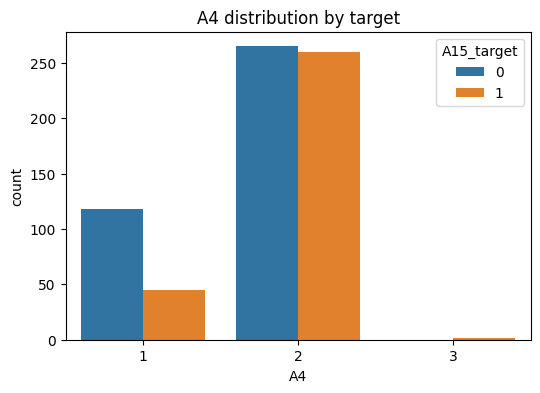

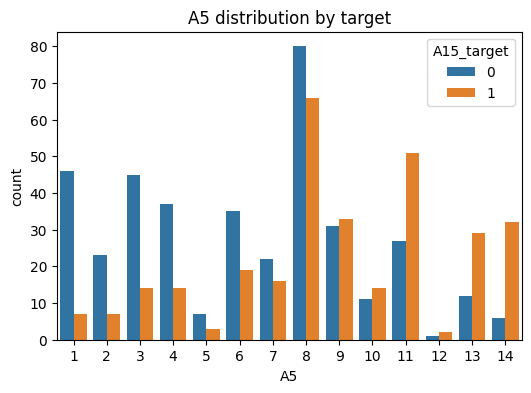

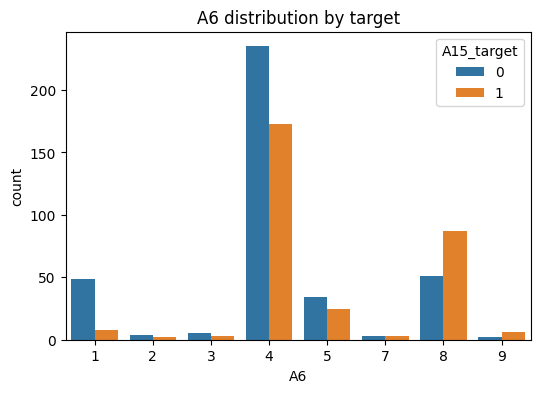

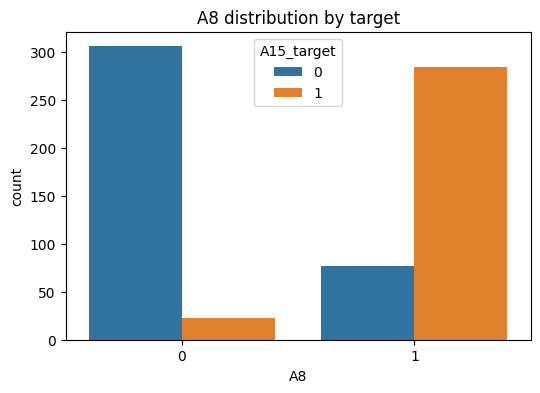

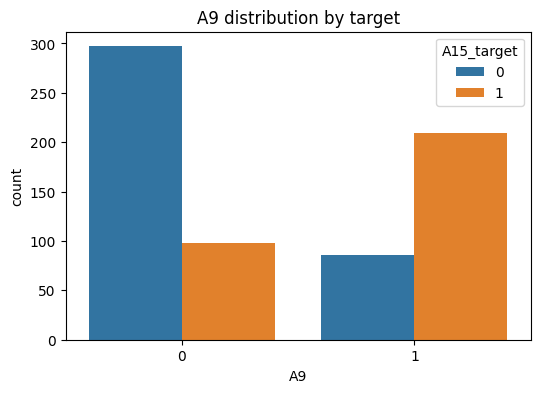

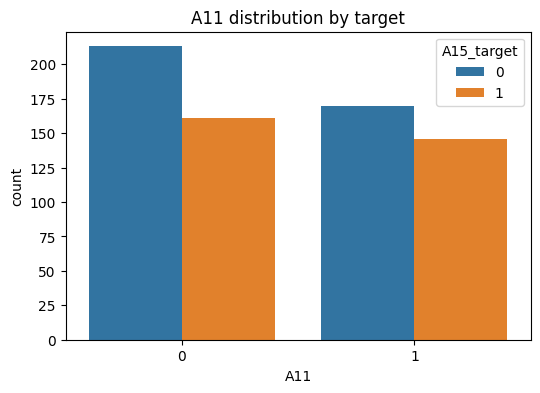

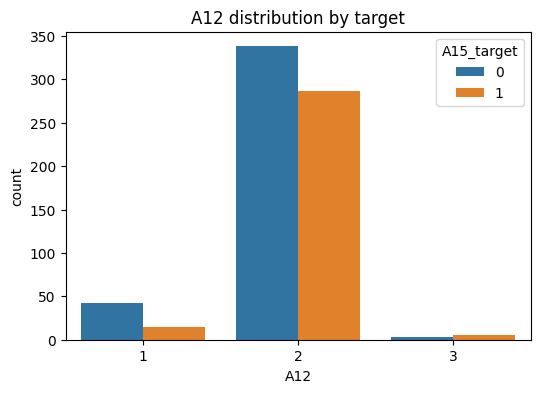

In [45]:
for feat in CATEGORICAL_FEATURES:
    if feat in df.columns:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=feat, hue='A15_target', data=df)
        plt.title(f'{feat} distribution by target')

### Categorical Features (8)
- **A1**: Binary (0,1) — account status
- **A4**: Ordinal (1,2,3) — credit history (originally p, g, gg)
- **A5**: Nominal (1-14) — purpose of credit (14 categories)
- **A6**: Nominal (1-9) — occupation (9 categories)
- **A8**: Binary (0,1) — telephone listed
- **A9**: Binary (0,1) — foreign worker status
- **A11**: Binary (0,1) — prior default history
- **A12**: Ordinal (1,2,3) — employment status (originally s, g, p)

## Key Findings

### Descriptive Statistics
- **A2** (age-like): mean ≈ 31.6, IQR ≈ [22.67, 37.71], range 13.75–80.25 — reasonably symmetric
- **A3** (small continuous): median 2.75, right-skewed (max 28) — some extreme cases
- **A7** (debt/loan metric): mean ≈ 2.22, skewed distribution (75th percentile ≈ 2.63, max 28.5) — outliers; transform before modeling
- **A13** and **A14**: large spread; A14 has extreme value (100001) suggesting data entry issues or special cases — inspect and handle appropriately
- **A8, A9, A11**: binary indicators with moderate prevalence (30–50% positive class)

# Bivariate Analysis

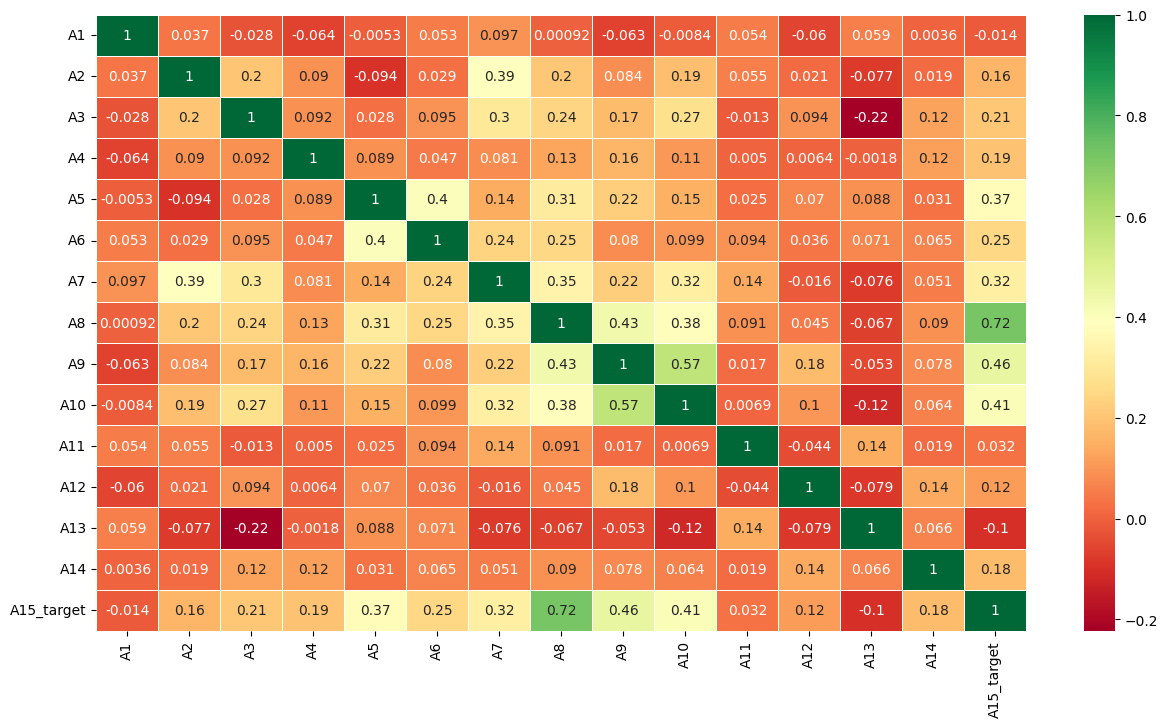

In [46]:
# Correlation Matrix
numeric_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
corr = df[numeric_cols].corr()
sns.heatmap(corr,linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()


### Predictive Power (Correlation with A15)
Ranked by absolute Pearson correlation:
1. **A8** (Telephone): 0.720 — strongest predictor; telephone listing strongly associated with approval
2. **A9** (Foreign worker): 0.458 — moderate positive correlation
3. **A10** (Months/tenure): 0.406 — duration in months correlated with approval
4. **A5** (Purpose): 0.374 — credit purpose matters for decision
5. **A7** (Debt metric): 0.322 — existing debt level affects approval

**Weak predictors** (r < 0.15):
- **A1**, **A11**, **A13**, **A14**, **A2**, **A12** — minimal linear correlation; may have nonlinear or weak effects

### Bivariate Insights
- **A8 & A9** show high correlation (0.46+), but both are strong approval predictors → consider multicollinearity in linear models
- **Group statistics**: Approved applicants (A15=1) have higher means/medians for A8, A9, A10, A5, A7 vs. denied applicants
  - E.g., A8 mean: 0.20 (denied) vs. 0.92 (approved); A9 mean: 0.22 (denied) vs. 0.68 (approved)

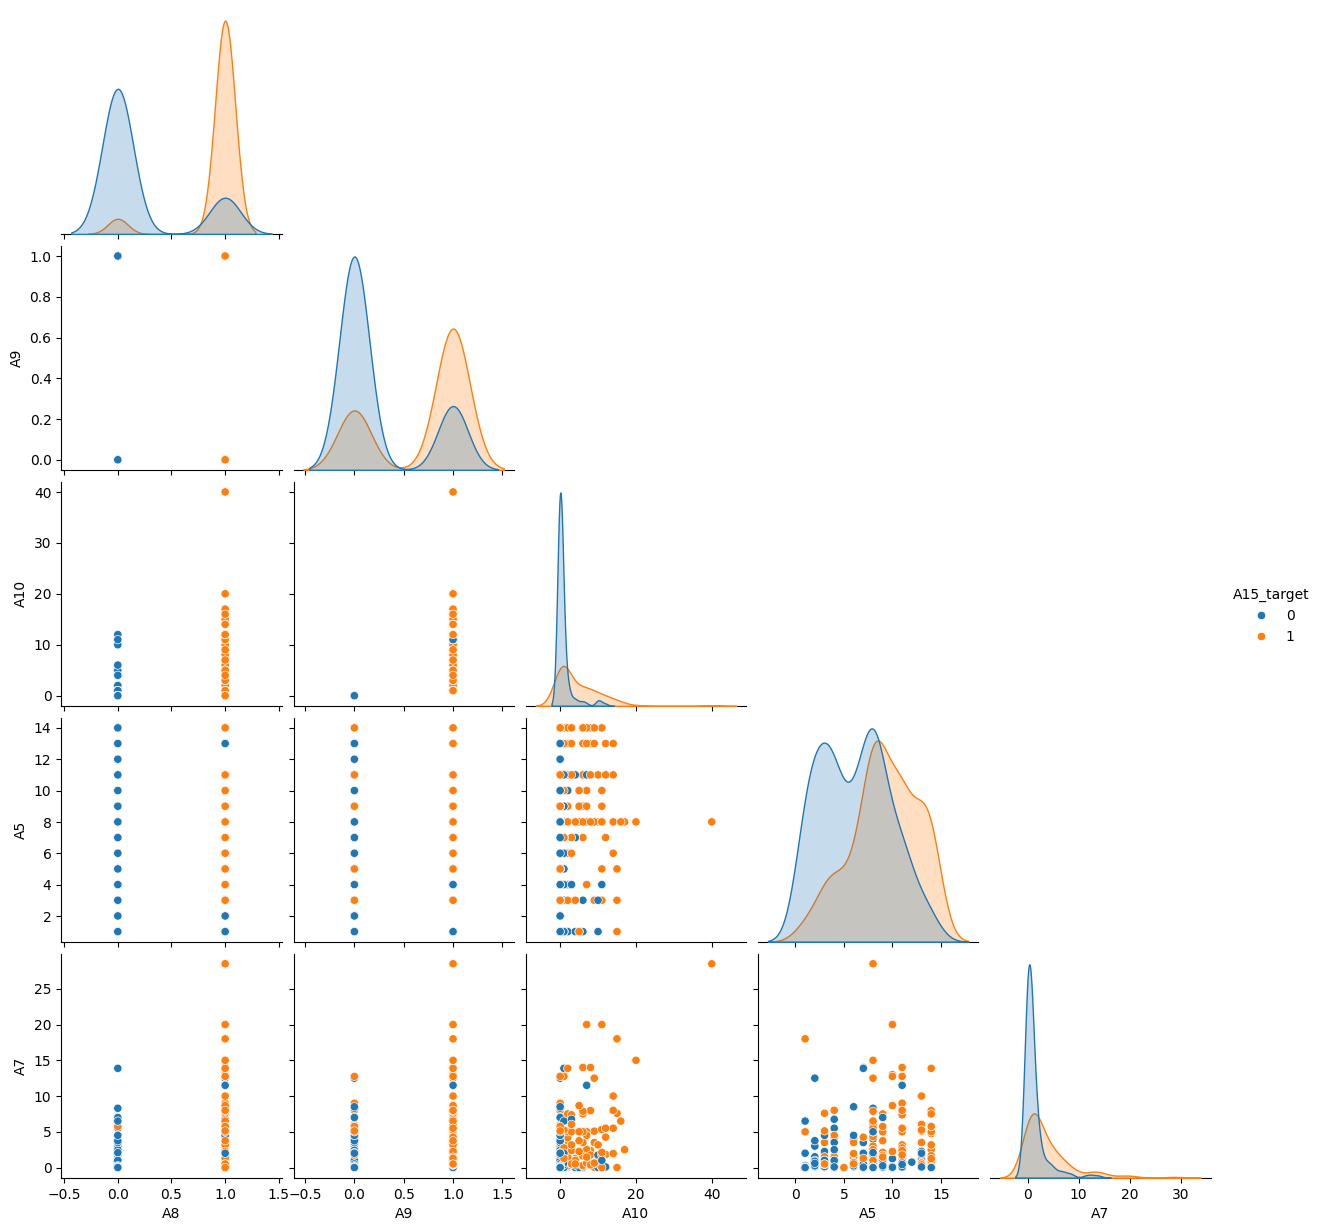

In [47]:
# Top 5 features correlated with target
cor_with_target = corr['A15_target'].abs().sort_values(ascending=False)

top_features = [c for c in cor_with_target.index if c != 'A15_target'][:5]

# Pairplot of top features
pp_df = df[top_features + ['A15_target']]
sample = pp_df.sample(n=min(300, len(pp_df)), random_state=1)
sns.pairplot(sample, hue='A15_target', corner=True)
plt.show()

## Preprocessing the Data

Handling Categorical Attributes

Since the size of the dataset is small, One Hot Encoding separately will lead to different shapes in the training and testing data. 

In [48]:
# Step 1: One-Hot Encoding (BEFORE Train/Test Split)
print(f"Original shape: {df.shape}")
print(f"Categorical features to encode: {CATEGORICAL_FEATURES}")

# Apply one-hot encoding with drop_first=True to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=CATEGORICAL_FEATURES, drop_first=True)

print(f"Shape after encoding: {df_encoded.shape}")
print(f"New columns after encoding: {df_encoded.columns.tolist()}")
df_encoded.head()

Original shape: (690, 15)
Categorical features to encode: ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']
Shape after encoding: (690, 35)
New columns after encoding: ['A2', 'A3', 'A7', 'A10', 'A13', 'A14', 'A15_target', 'A1_1', 'A4_2', 'A4_3', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_7', 'A6_8', 'A6_9', 'A8_1', 'A9_1', 'A11_1', 'A12_2', 'A12_3']


,A2,A3,A7,A10,A13,A14,A15_target,A1_1,A4_2,A4_3,...,A6_4,A6_5,A6_7,A6_8,A6_9,A8_1,A9_1,A11_1,A12_2,A12_3
0,22.08,11.46,1.585,0,100,1213,0,True,True,False,...,True,False,False,False,False,False,False,True,True,False
1,22.67,7.00,0.165,0,160,1,0,False,True,False,...,True,False,False,False,False,False,False,False,True,False
2,29.58,1.75,1.250,0,280,1,0,False,False,False,...,True,False,False,False,False,False,False,True,True,False
3,21.67,11.50,0.000,11,0,1,1,False,False,False,...,False,False,False,False,False,True,True,True,True,False
4,20.17,8.17,1.960,14,60,159,1,True,True,False,...,True,False,False,False,False,True,True,False,True,False


## Feature Selection

✓ We can do it if using:

- Logistic Regression (interpretability matters)
- Linear models with regularization (L1/L2)

✗ NOT NEEDED if using:

- Random Forest, XGBoost, LightGBM (they handle irrelevant features)

In [49]:
# Feature Selection Analysis
print("=" * 80)
print("FEATURE SELECTION ANALYSIS")
print("=" * 80)

# Correlation-based Feature Selection
print("\n4.1: Correlation with Target (A15_target)")
print("-" * 60)

# Calculate correlations for numerical features only
numerical_cols_encoded = df_encoded.select_dtypes(include=['int64', 'float64']).columns
correlation_with_target = df_encoded[numerical_cols_encoded].corr()['A15_target'].abs().sort_values(ascending=False)

print("\nTop 10 features by correlation with target:")
print(correlation_with_target.head(10))

# Features with weak correlation (|r| < 0.1)
weak_features = correlation_with_target[correlation_with_target < 0.1].index.tolist()
print(f"\nWeak predictors (|r| < 0.1): {weak_features}")
print(f"    - These can be removed for linear models but are retained in tree-based models")

FEATURE SELECTION ANALYSIS

4.1: Correlation with Target (A15_target)
------------------------------------------------------------

Top 10 features by correlation with target:
A15_target    1.000000
A10           0.406410
A7            0.322475
A3            0.206294
A14           0.175657
A2            0.161626
A13           0.099972
Name: A15_target, dtype: float64

Weak predictors (|r| < 0.1): ['A13']
    - These can be removed for linear models but are retained in tree-based models


In [50]:
# Multicollinearity Check (VIF - Variance Inflation Factor)
print("\n : Multicollinearity Check (Variance Inflation Factor)")
print("-" * 60)

from statsmodels.stats.outliers_influence import variance_inflation_factor

features = df_encoded.drop(columns=['A15_target'])
# Calculate VIF for numerical features
X_numerical = features.select_dtypes(include=['int64', 'float64'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X_numerical.columns
vif_data["VIF"] = [variance_inflation_factor(X_numerical.values, i) for i in range(X_numerical.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

print("\nVariance Inflation Factor (VIF) for numerical features:")
print(vif_data.head(15))
print("\nInterpretation:")
print("    VIF < 5: Low multicollinearity (acceptable)")
print("    VIF 5-10: Moderate multicollinearity (may need attention)")
print("    VIF > 10: High multicollinearity (consider removing feature)")

high_vif = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
if high_vif:
    print(f"\n  High VIF features (> 10): {high_vif}")
else:
    print("\n No severe multicollinearity detected")


 : Multicollinearity Check (Variance Inflation Factor)
------------------------------------------------------------

Variance Inflation Factor (VIF) for numerical features:
  Feature       VIF
0      A2  3.558469
1      A3  2.182103
4     A13  1.862041
2      A7  1.861120
3     A10  1.451679
5     A14  1.065687

Interpretation:
    VIF < 5: Low multicollinearity (acceptable)
    VIF 5-10: Moderate multicollinearity (may need attention)
    VIF > 10: High multicollinearity (consider removing feature)

 No severe multicollinearity detected


## FEATURE ENGINEERING

In [51]:
# ============================================================================
# FEATURE ENGINEERING
# ============================================================================

print("=" * 100)
print(" " * 30 + "PHASE 1: FEATURE ENGINEERING")
print("=" * 100)

import warnings
warnings.filterwarnings('ignore')

df_fe = df_encoded.copy()

# 1.1: Handle Outliers (Winsorization)
print("\n1.1: HANDLING OUTLIERS - WINSORIZATION")
print("-" * 100)

a14_95 = df_fe['A14'].quantile(0.95)
a13_95 = df_fe['A13'].quantile(0.95)

df_fe['A14_winsorized'] = df_fe['A14'].clip(upper=a14_95)
df_fe['A13_winsorized'] = df_fe['A13'].clip(upper=a13_95)

print(f"✓ A14 winsorized at 95th percentile: {a14_95:.2f}")
print(f"✓ A13 winsorized at 95th percentile: {a13_95:.2f}")

# 1.2: Log Transform Skewed Features
print("\n1.2: LOG TRANSFORMATION - SKEWED FEATURES")
print("-" * 100)

df_fe['A7_log'] = np.log1p(df_fe['A7'])
df_fe['A3_log'] = np.log1p(df_fe['A3'])
df_fe['A14_log'] = np.log1p(df_fe['A14'])

print(f"✓ Log-transformed A7, A3, A14 (handle right-skewed distributions)")

# 1.3: Feature Interactions
print("\n1.3: FEATURE INTERACTIONS")
print("-" * 100)

# A8 (Telephone) × A9 (Foreign worker) - both strong predictors
a8_col = [c for c in df_fe.columns if c.startswith('A8_')][0]
a9_col = [c for c in df_fe.columns if c.startswith('A9_')][0]
df_fe['A8_A9_interaction'] = df_fe[a8_col] * df_fe[a9_col]

# A2 × A7 - age/income × debt interaction
df_fe['A2_A7_interaction'] = df_fe['A2'] * df_fe['A7_log']

print(f"✓ Created A8 × A9 interaction (telephone × foreign worker)")
print(f"✓ Created A2 × A7 interaction (age × debt)")

# 1.4: Drop Original Skewed Features (keep engineered versions)
print("\n1.4: DROP ORIGINAL FEATURES (KEEPING ENGINEERED VERSIONS)")
print("-" * 100)

features_to_drop = ['A14', 'A13', 'A7', 'A3']
X = df_fe.drop(columns=['A15_target'] + features_to_drop)
y = df_fe['A15_target']

print(f"✓ Dropped original features: {features_to_drop}")
print(f"✓ Engineering complete - New shape: {X.shape}")

# 1.5: Re-split with Engineered Features
print("\n1.5: RE-SPLITTING DATA WITH ENGINEERED FEATURES")
print("-" * 100)

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"✓ Train set shape: {X_train_fe.shape}")
print(f"✓ Test set shape: {X_test_fe.shape}")
print(f"✓ Train target: {y_train_fe.value_counts().to_dict()}")
print(f"✓ Test target: {y_test_fe.value_counts().to_dict()}")

                              PHASE 1: FEATURE ENGINEERING

1.1: HANDLING OUTLIERS - WINSORIZATION
----------------------------------------------------------------------------------------------------
✓ A14 winsorized at 95th percentile: 4120.40
✓ A13 winsorized at 95th percentile: 460.00

1.2: LOG TRANSFORMATION - SKEWED FEATURES
----------------------------------------------------------------------------------------------------
✓ Log-transformed A7, A3, A14 (handle right-skewed distributions)

1.3: FEATURE INTERACTIONS
----------------------------------------------------------------------------------------------------
✓ Created A8 × A9 interaction (telephone × foreign worker)
✓ Created A2 × A7 interaction (age × debt)

1.4: DROP ORIGINAL FEATURES (KEEPING ENGINEERED VERSIONS)
----------------------------------------------------------------------------------------------------
✓ Dropped original features: ['A14', 'A13', 'A7', 'A3']
✓ Engineering complete - New shape: (690, 37)

1.5: RE-

## FEATURE SCALING

✓ We can do it because:

- Some features (A13, A14) have extreme ranges
- Uniformity ensures consistent regularization
- Doesn't hurt tree-based models, essential for linear/distance-based
- Required for proper gradient descent in neural networks

In [52]:
# ============================================================================
# FEATURE SCALING & PREPARATION
# ============================================================================

print("\n" + "=" * 100)
print(" " * 25 + " FEATURE SCALING & PREPARATION")
print("=" * 100)

from sklearn.preprocessing import StandardScaler

# Scale features for linear/distance-based models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_fe.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_fe.columns)

print(f"\n✓ StandardScaler applied")
print(f"  Train - Mean: {X_train_scaled_df.mean().mean():.6f}, Std: {X_train_scaled_df.std().mean():.6f}")
print(f"  Test  - Mean: {X_test_scaled_df.mean().mean():.6f}, Std: {X_test_scaled_df.std().mean():.6f}")


                          FEATURE SCALING & PREPARATION

✓ StandardScaler applied
  Train - Mean: -0.000000, Std: 1.000907
  Test  - Mean: 0.024295, Std: 1.020343


## MODEL TRAINING (BASELINE)

In [53]:
# ============================================================================
# MODEL TRAINING - BASELINE MODELS
# ============================================================================

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

print("\n" + "=" * 100)
print(" " * 20 + " MODEL TRAINING - BASELINE & ADVANCED MODELS")
print("=" * 100)

print("\n3.1: BASELINE MODELS")
print("-" * 100)

models_baseline = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Naive Bayes': GaussianNB()
}

baseline_results = {}

for name, model in models_baseline.items():
    print(f"\nTraining {name}...")
    
    # Use scaled features for logistic regression
    if name == 'Logistic Regression':
        X_train_use, X_test_use = X_train_scaled_df, X_test_scaled_df
    else:
        X_train_use, X_test_use = X_train_fe, X_test_fe
    
    model.fit(X_train_use, y_train_fe)
    y_pred = model.predict(X_test_use)
    y_pred_proba = model.predict_proba(X_test_use)[:, 1]
    
    baseline_results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'X_train_used': X_train_use,
        'X_test_used': X_test_use
    }
    
    print(f"  ✓ {name} trained successfully")

print("\n✓ BASELINE MODELS TRAINED")


                     MODEL TRAINING - BASELINE & ADVANCED MODELS

3.1: BASELINE MODELS
----------------------------------------------------------------------------------------------------

Training Logistic Regression...
  ✓ Logistic Regression trained successfully

Training Naive Bayes...
  ✓ Naive Bayes trained successfully

✓ BASELINE MODELS TRAINED


## MODEL TRAINING (ADVANCED)

In [54]:
# ============================================================================
# MODEL TRAINING - ADVANCED MODELS
# ============================================================================

print("\n3.2: ADVANCED MODELS")
print("-" * 100)

models_advanced = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, 
                                           class_weight='balanced', n_jobs=-1),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced', gamma='scale')
}

advanced_results = {}

for name, model in models_advanced.items():
    print(f"\nTraining {name}...")
    
    # Use scaled features for SVM
    if 'SVM' in name:
        X_train_use, X_test_use = X_train_scaled_df, X_test_scaled_df
    else:
        X_train_use, X_test_use = X_train_fe, X_test_fe
    
    model.fit(X_train_use, y_train_fe)
    y_pred = model.predict(X_test_use)
    y_pred_proba = model.predict_proba(X_test_use)[:, 1]
    
    advanced_results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'X_train_used': X_train_use,
        'X_test_used': X_test_use
    }
    
    print(f"  ✓ {name} trained successfully")

print("\n✓ ALL MODELS TRAINED")


3.2: ADVANCED MODELS
----------------------------------------------------------------------------------------------------

Training Decision Tree...
  ✓ Decision Tree trained successfully

Training Random Forest...
  ✓ Random Forest trained successfully

Training SVM (RBF)...
  ✓ SVM (RBF) trained successfully

✓ ALL MODELS TRAINED


## PHASE - CROSS-VALIDATION

In [55]:
# ============================================================================
# CROSS-VALIDATION (5-FOLD STRATIFIED)
# ============================================================================

from sklearn.model_selection import cross_val_score, StratifiedKFold

print("\n" + "=" * 100)
print(" " * 25 + " CROSS-VALIDATION (5-FOLD STRATIFIED)")
print("=" * 100)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_models = {**models_baseline, **models_advanced}
cv_results = {}

for name, model in all_models.items():
    print(f"\n{name}:")
    
    # Choose appropriate data
    if name in ['Logistic Regression', 'SVM (RBF)']:
        X_use = X_train_scaled_df
    else:
        X_use = X_train_fe
    
    # Cross-validation scores
    cv_f1 = cross_val_score(model, X_use, y_train_fe, cv=cv, scoring='f1', n_jobs=-1)
    cv_auc = cross_val_score(model, X_use, y_train_fe, cv=cv, scoring='roc_auc', n_jobs=-1)
    cv_accuracy = cross_val_score(model, X_use, y_train_fe, cv=cv, scoring='accuracy', n_jobs=-1)
    
    cv_results[name] = {
        'f1_mean': cv_f1.mean(),
        'f1_std': cv_f1.std(),
        'auc_mean': cv_auc.mean(),
        'auc_std': cv_auc.std(),
        'accuracy_mean': cv_accuracy.mean(),
        'accuracy_std': cv_accuracy.std()
    }
    
    print(f"  F1-Score:  {cv_f1.mean():.4f} (+/- {cv_f1.std():.4f})")
    print(f"  ROC-AUC:   {cv_auc.mean():.4f} (+/- {cv_auc.std():.4f})")
    print(f"  Accuracy:  {cv_accuracy.mean():.4f} (+/- {cv_accuracy.std():.4f})")

print("\n✓ CROSS-VALIDATION COMPLETED")


                          CROSS-VALIDATION (5-FOLD STRATIFIED)

Logistic Regression:
  F1-Score:  0.8412 (+/- 0.0126)
  ROC-AUC:   0.9263 (+/- 0.0114)
  Accuracy:  0.8533 (+/- 0.0085)

Naive Bayes:
  F1-Score:  0.7895 (+/- 0.0204)
  ROC-AUC:   0.8755 (+/- 0.0197)
  Accuracy:  0.8206 (+/- 0.0180)

Decision Tree:
  F1-Score:  0.8102 (+/- 0.0146)
  ROC-AUC:   0.8328 (+/- 0.0192)
  Accuracy:  0.8261 (+/- 0.0221)

Random Forest:
  F1-Score:  0.8610 (+/- 0.0240)
  ROC-AUC:   0.9322 (+/- 0.0127)
  Accuracy:  0.8751 (+/- 0.0266)

SVM (RBF):
  F1-Score:  0.8590 (+/- 0.0212)
  ROC-AUC:   0.9257 (+/- 0.0177)
  Accuracy:  0.8678 (+/- 0.0215)

✓ CROSS-VALIDATION COMPLETED


## MODEL EVALUATION (COMPREHENSIVE METRICS)

In [58]:
# ============================================================================
# COMPREHENSIVE MODEL EVALUATION ON TEST SET
# ============================================================================
import os
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, confusion_matrix, classification_report, roc_curve)

print("\n" + "=" * 100)
print(" " * 20 + "PHASE 5: COMPREHENSIVE MODEL EVALUATION ON TEST SET")
print("=" * 100)

results_df = []
all_results_combined = {**baseline_results, **advanced_results}

for model_name, results in all_results_combined.items():
    y_pred = results['y_pred']
    y_pred_proba = results['y_pred_proba']
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_fe, y_pred)
    precision = precision_score(y_test_fe, y_pred, average='weighted')
    recall = recall_score(y_test_fe, y_pred, average='weighted')
    f1 = f1_score(y_test_fe, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test_fe, y_pred_proba)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_fe, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    
    print(f"\n{'=' * 100}")
    print(f"{model_name.upper()}")
    print(f"{'=' * 100}")
    print(f"  Accuracy:       {accuracy:.4f}")
    print(f"  Precision:      {precision:.4f}")
    print(f"  Recall:         {recall:.4f}")
    print(f"  F1-Score:       {f1:.4f}")
    print(f"  ROC-AUC:        {roc_auc:.4f}")
    print(f"  Sensitivity:    {sensitivity:.4f} (True Positive Rate)")
    print(f"  Specificity:    {specificity:.4f} (True Negative Rate)")
    
    print(f"\n  Confusion Matrix:")
    print(f"    TN: {tn} | FP: {fp}")
    print(f"    FN: {fn} | TP: {tp}")
    
    results_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'CV_F1_Mean': cv_results[model_name]['f1_mean'],
        'CV_AUC_Mean': cv_results[model_name]['auc_mean']
    })

# Create comparison table
results_table = pd.DataFrame(results_df).sort_values('F1-Score', ascending=False)

print("\n" + "=" * 100)
print("MODEL COMPARISON TABLE (SORTED BY F1-SCORE)")
print("=" * 100)
print(results_table.to_string(index=False))
OUT_DIR_met = '../outputs/metrics'

# Save results table
results_table.to_csv(os.path.join(OUT_DIR_met, 'model_evaluation_results.csv'), index=False)
print(f"\n✓ Results saved to: {os.path.join(OUT_DIR_met, 'model_evaluation_results.csv')}")


                    PHASE 5: COMPREHENSIVE MODEL EVALUATION ON TEST SET

LOGISTIC REGRESSION
  Accuracy:       0.7826
  Precision:      0.8039
  Recall:         0.7826
  F1-Score:       0.7826
  ROC-AUC:        0.9010
  Sensitivity:    0.8852 (True Positive Rate)
  Specificity:    0.7013 (True Negative Rate)

  Confusion Matrix:
    TN: 54 | FP: 23
    FN: 7 | TP: 54

NAIVE BAYES
  Accuracy:       0.8261
  Precision:      0.8261
  Recall:         0.8261
  F1-Score:       0.8261
  ROC-AUC:        0.8586
  Sensitivity:    0.8033 (True Positive Rate)
  Specificity:    0.8442 (True Negative Rate)

  Confusion Matrix:
    TN: 65 | FP: 12
    FN: 12 | TP: 49

DECISION TREE
  Accuracy:       0.7899
  Precision:      0.7903
  Recall:         0.7899
  F1-Score:       0.7900
  ROC-AUC:        0.7893
  Sensitivity:    0.7705 (True Positive Rate)
  Specificity:    0.8052 (True Negative Rate)

  Confusion Matrix:
    TN: 62 | FP: 15
    FN: 14 | TP: 47

RANDOM FOREST
  Accuracy:       0.8478
  Pre

## HYPERPARAMETER TUNING

In [59]:
# ============================================================================
# HYPERPARAMETER TUNING (GridSearchCV)
# ============================================================================

from sklearn.model_selection import GridSearchCV

print("\n" + "=" * 100)
print(" " * 20 + " HYPERPARAMETER TUNING (GridSearchCV)")
print("=" * 100)

# Tune Random Forest
print("\n6.1: TUNING RANDOM FOREST")
print("-" * 100)

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [8, 10, 12, 15],
    'min_samples_split': [2, 5, 10],
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
    rf_params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nSearching optimal hyperparameters for Random Forest...")
rf_grid.fit(X_train_fe, y_train_fe)

print(f"\n✓ Best RF Parameters: {rf_grid.best_params_}")
print(f"✓ Best CV F1-Score: {rf_grid.best_score_:.4f}")

rf_tuned = rf_grid.best_estimator_
y_pred_rf_tuned = rf_tuned.predict(X_test_fe)
y_pred_proba_rf_tuned = rf_tuned.predict_proba(X_test_fe)[:, 1]

rf_tuned_f1 = f1_score(y_test_fe, y_pred_rf_tuned, average='weighted')
rf_tuned_auc = roc_auc_score(y_test_fe, y_pred_proba_rf_tuned)

print(f"✓ Tuned RF Test F1-Score: {rf_tuned_f1:.4f}")
print(f"✓ Tuned RF Test ROC-AUC: {rf_tuned_auc:.4f}")

# Tune Logistic Regression
print("\n6.2: TUNING LOGISTIC REGRESSION")
print("-" * 100)

lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    lr_params,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nSearching optimal hyperparameters for Logistic Regression...")
lr_grid.fit(X_train_scaled_df, y_train_fe)

print(f"\n✓ Best LR Parameters: {lr_grid.best_params_}")
print(f"✓ Best CV F1-Score: {lr_grid.best_score_:.4f}")

lr_tuned = lr_grid.best_estimator_
y_pred_lr_tuned = lr_tuned.predict(X_test_scaled_df)
y_pred_proba_lr_tuned = lr_tuned.predict_proba(X_test_scaled_df)[:, 1]

lr_tuned_f1 = f1_score(y_test_fe, y_pred_lr_tuned, average='weighted')
lr_tuned_auc = roc_auc_score(y_test_fe, y_pred_proba_lr_tuned)

print(f"✓ Tuned LR Test F1-Score: {lr_tuned_f1:.4f}")
print(f"✓ Tuned LR Test ROC-AUC: {lr_tuned_auc:.4f}")

print("\n✓ HYPERPARAMETER TUNING COMPLETED")


                     HYPERPARAMETER TUNING (GridSearchCV)

6.1: TUNING RANDOM FOREST
----------------------------------------------------------------------------------------------------

Searching optimal hyperparameters for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

✓ Best RF Parameters: {'max_depth': 15, 'min_samples_split': 10, 'n_estimators': 50}
✓ Best CV F1-Score: 0.8631
✓ Tuned RF Test F1-Score: 0.8411
✓ Tuned RF Test ROC-AUC: 0.9212

6.2: TUNING LOGISTIC REGRESSION
----------------------------------------------------------------------------------------------------

Searching optimal hyperparameters for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

✓ Best LR Parameters: {'C': 1}
✓ Best CV F1-Score: 0.8574
✓ Tuned LR Test F1-Score: 0.7826
✓ Tuned LR Test ROC-AUC: 0.9010

✓ HYPERPARAMETER TUNING COMPLETED


## FEATURE IMPORTANCE (TREE-BASED & PERMUTATION)


                     FEATURE IMPORTANCE ANALYSIS

7.1: TREE-BASED FEATURE IMPORTANCE (Random Forest)
----------------------------------------------------------------------------------------------------

Top 15 Most Important Features:
          Feature  Importance
             A8_1    0.244246
A8_A9_interaction    0.124692
              A10    0.075784
           A7_log    0.060021
A2_A7_interaction    0.059634
           A3_log    0.057747
          A14_log    0.056329
   A14_winsorized    0.053640
               A2    0.053004
   A13_winsorized    0.048338
             A9_1    0.035844
             A6_8    0.012201
             A4_2    0.010711
             A1_1    0.010137
            A11_1    0.009643


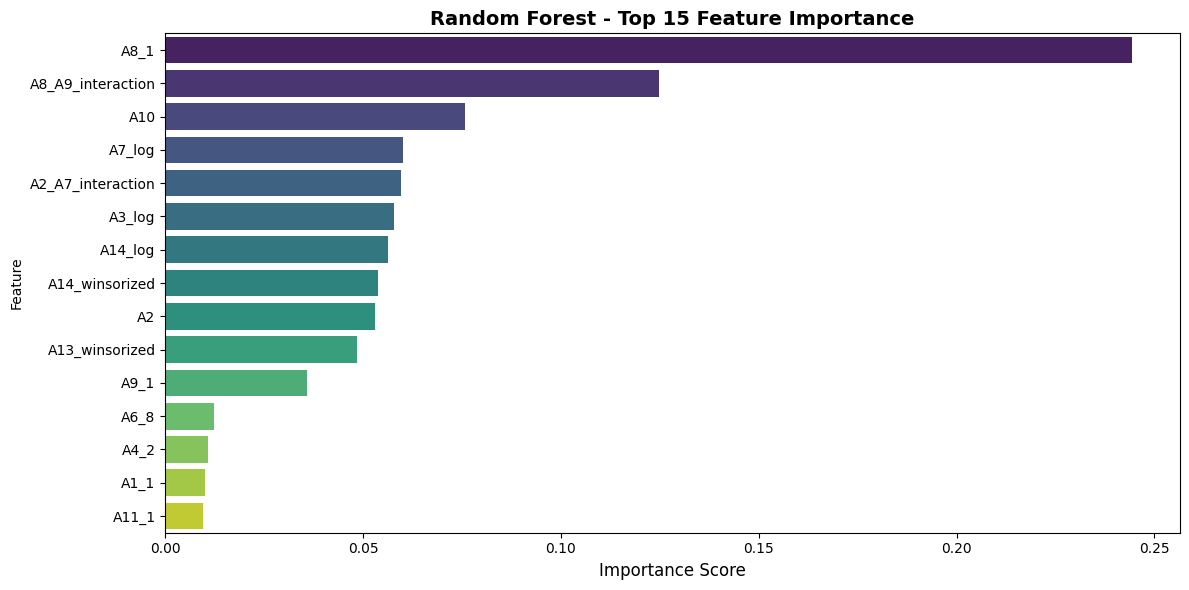


✓ Feature importance plot saved

7.2: PERMUTATION FEATURE IMPORTANCE (Logistic Regression)
----------------------------------------------------------------------------------------------------

Top 15 Permutation Importance Features:
          Feature   Importance
             A8_1 1.681159e-01
A8_A9_interaction 3.840580e-02
             A6_8 1.449275e-02
             A5_9 1.086957e-02
             A5_7 7.971014e-03
              A10 7.246377e-03
             A5_5 7.246377e-03
            A5_10 4.347826e-03
           A3_log 3.623188e-03
             A4_3 2.898551e-03
            A11_1 2.898551e-03
             A1_1 2.173913e-03
            A5_11 7.246377e-04
             A6_2 7.246377e-04
             A4_2 4.440892e-17


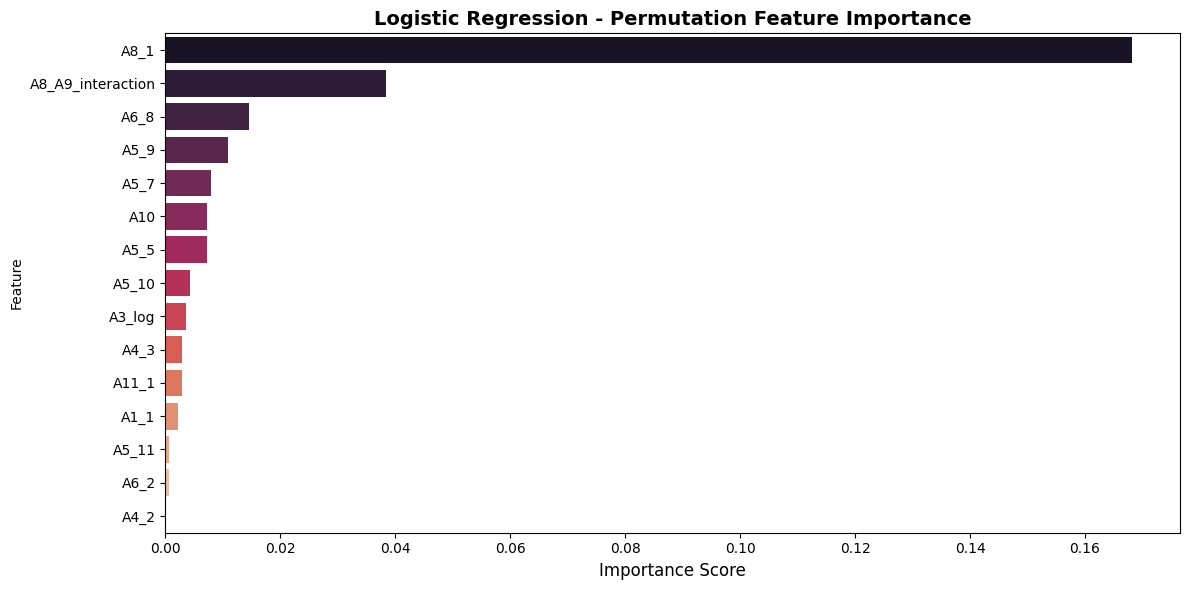


✓ Permutation importance plot saved

✓ FEATURE IMPORTANCE ANALYSIS COMPLETED


In [60]:
# ============================================================================
# FEATURE IMPORTANCE ANALYSIS
# ============================================================================
OUT_DIR_fig = '../outputs/figures'
print("\n" + "=" * 100)
print(" " * 20 + " FEATURE IMPORTANCE ANALYSIS")
print("=" * 100)

# 7.1: Tree-based Feature Importance
print("\n7.1: TREE-BASED FEATURE IMPORTANCE (Random Forest)")
print("-" * 100)

rf_model = advanced_results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': X_train_fe.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest - Top 15 Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(OUT_DIR_fig, 'feature_importance_random_forest.png'), dpi=300, bbox_inches='tight')
plt.close()
print(f"\n✓ Feature importance plot saved")

# 7.2: Permutation Feature Importance
print("\n7.2: PERMUTATION FEATURE IMPORTANCE (Logistic Regression)")
print("-" * 100)

from sklearn.inspection import permutation_importance

lr_model = baseline_results['Logistic Regression']['model']

perm_importance = permutation_importance(
    lr_model, X_test_scaled_df, y_test_fe, n_repeats=10, random_state=42, n_jobs=-1
)

perm_importance_df = pd.DataFrame({
    'Feature': X_train_fe.columns,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

print("\nTop 15 Permutation Importance Features:")
print(perm_importance_df.head(15).to_string(index=False))

plt.figure(figsize=(12, 6))
sns.barplot(data=perm_importance_df.head(15), x='Importance', y='Feature', palette='rocket')
plt.title('Logistic Regression - Permutation Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(OUT_DIR_fig, 'permutation_importance_lr.png'), dpi=300, bbox_inches='tight')
plt.close()
print(f"\n✓ Permutation importance plot saved")

print("\n✓ FEATURE IMPORTANCE ANALYSIS COMPLETED")

## ERROR ANALYSIS


                    ERROR ANALYSIS & MISCLASSIFICATION

Analyzing errors for: Random Forest
----------------------------------------------------------------------------------------------------

Total errors: 21/138 (15.22%)

Confusion Matrix:
  True Negatives:  0 (Correct Denial)
  True Positives:  54 (Correct Approval)
  False Positives: 0 ⚠️ (Approved but risky)
  False Negatives: 0 ⚠️ (Rejected but good)

Business Impact:
  Type I Error (FP): nan% - Default risk
  Type II Error (FN): 0.00% - Business loss


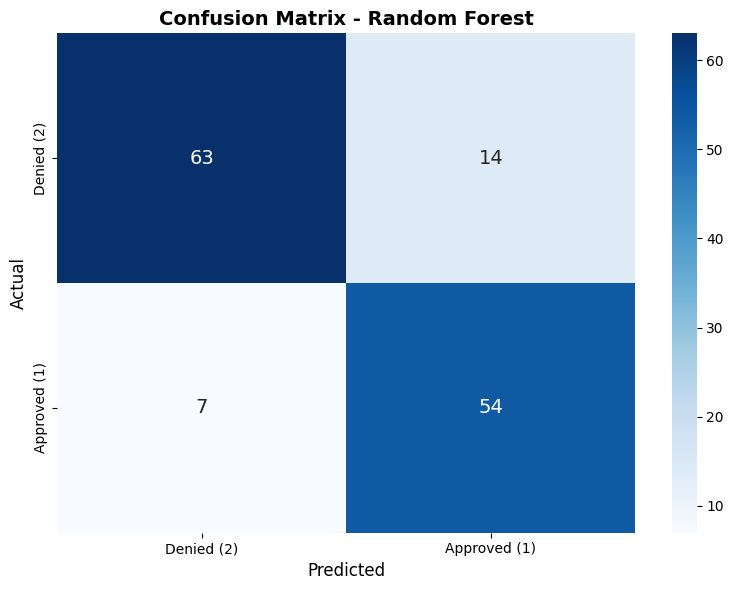


✓ Confusion matrix saved

✓ ERROR ANALYSIS COMPLETED


In [61]:
# ============================================================================
# ERROR ANALYSIS & MISCLASSIFICATION
# ============================================================================

print("\n" + "=" * 100)
print(" " * 20 + "ERROR ANALYSIS & MISCLASSIFICATION")
print("=" * 100)

best_model_name = results_table.iloc[0]['Model']
best_model_results = (advanced_results if best_model_name in advanced_results else baseline_results)[best_model_name]

y_pred_best = best_model_results['y_pred']
y_pred_proba_best = best_model_results['y_pred_proba']

print(f"\nAnalyzing errors for: {best_model_name}")
print("-" * 100)

errors = y_test_fe != y_pred_best
total_errors = errors.sum()
error_rate = total_errors / len(y_test_fe) * 100

print(f"\nTotal errors: {total_errors}/{len(y_test_fe)} ({error_rate:.2f}%)")

# Error breakdown
fp_mask = (y_pred_best == 1) & (y_test_fe == 2)
fn_mask = (y_pred_best == 2) & (y_test_fe == 1)

fp_count = fp_mask.sum()
fn_count = fn_mask.sum()
tn_count = ((y_pred_best == 2) & (y_test_fe == 2)).sum()
tp_count = ((y_pred_best == 1) & (y_test_fe == 1)).sum()

print(f"\nConfusion Matrix:")
print(f"  True Negatives:  {tn_count} (Correct Denial)")
print(f"  True Positives:  {tp_count} (Correct Approval)")
print(f"  False Positives: {fp_count} ⚠️ (Approved but risky)")
print(f"  False Negatives: {fn_count} ⚠️ (Rejected but good)")

print(f"\nBusiness Impact:")
print(f"  Type I Error (FP): {fp_count / (fp_count + tn_count) * 100:.2f}% - Default risk")
print(f"  Type II Error (FN): {fn_count / (fn_count + tp_count) * 100:.2f}% - Business loss")

# Visualize confusion matrix
cm_best = confusion_matrix(y_test_fe, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Denied (2)', 'Approved (1)'],
            yticklabels=['Denied (2)', 'Approved (1)'],
            annot_kws={'size': 14})
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(OUT_DIR_fig, f'confusion_matrix_{best_model_name.lower().replace(" ", "_")}.png'), 
            dpi=300, bbox_inches='tight')
plt.close()

print(f"\n✓ Confusion matrix saved")
print("\n✓ ERROR ANALYSIS COMPLETED")

## VISUALIZATIONS (ROC, METRICS, CV)


                    PHASE 9: COMPREHENSIVE VISUALIZATIONS

9.1: GENERATING ROC CURVES
----------------------------------------------------------------------------------------------------


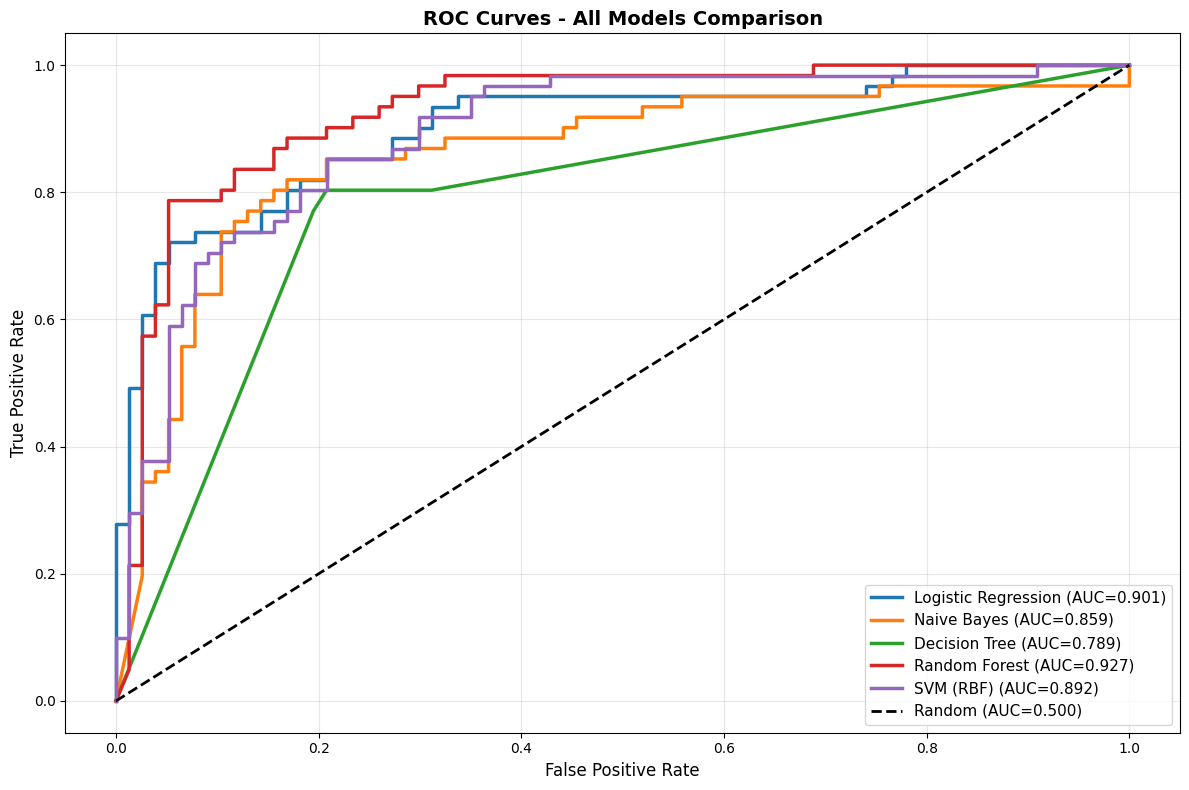

✓ ROC curves saved

9.2: GENERATING METRICS COMPARISON CHARTS
----------------------------------------------------------------------------------------------------


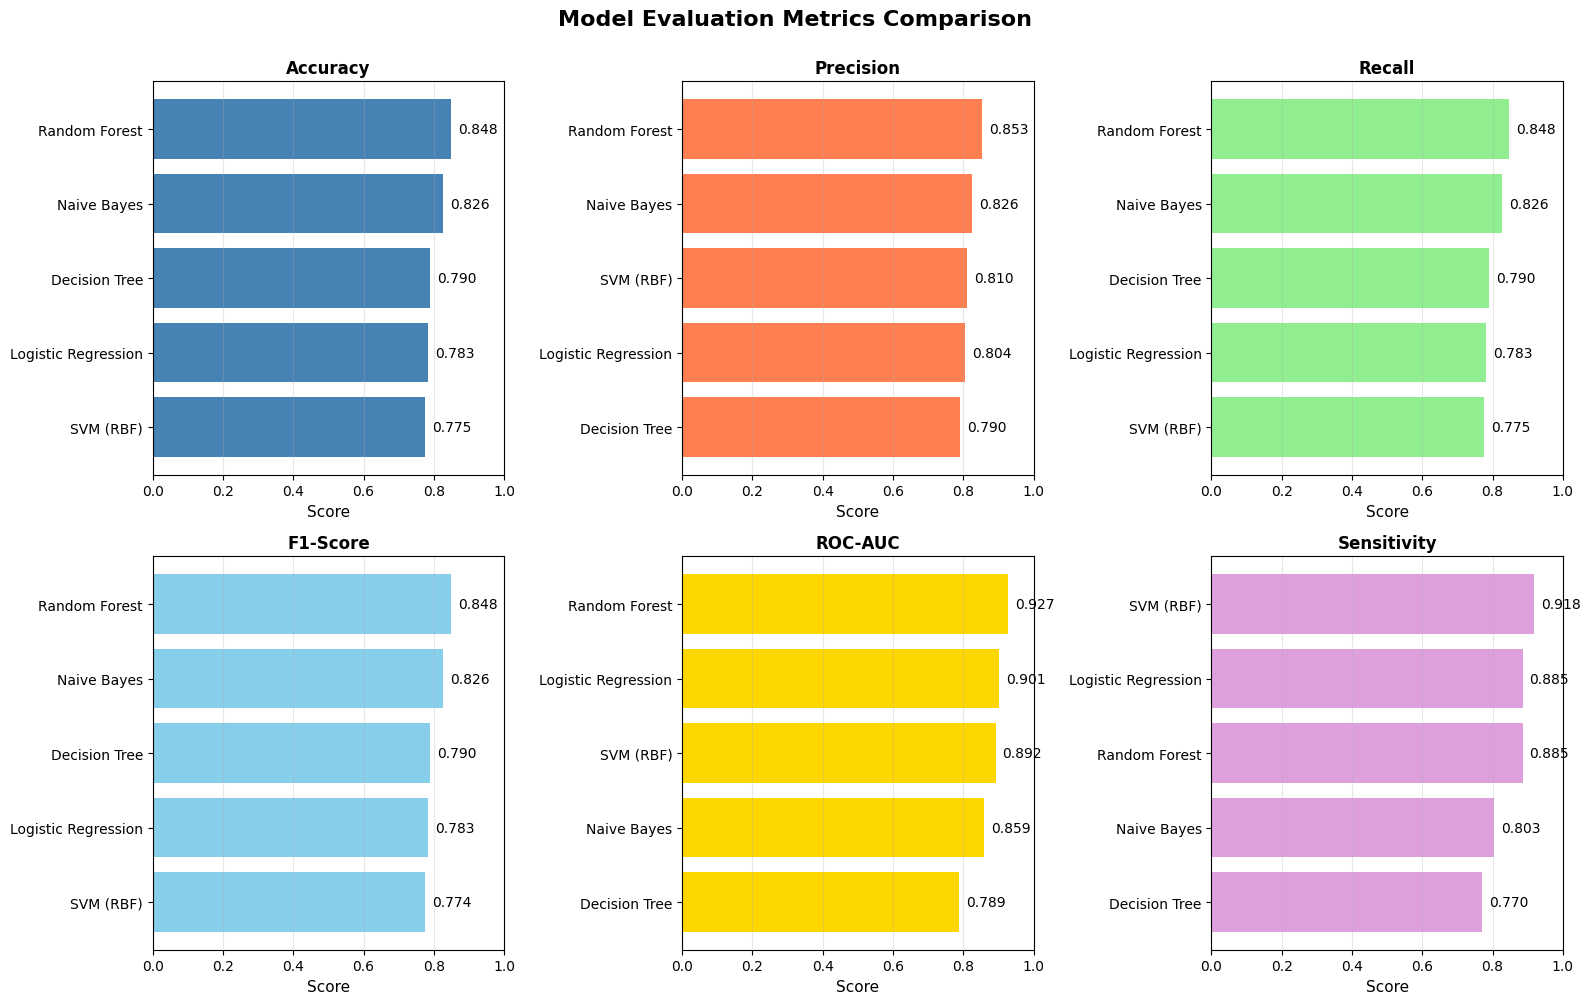

✓ Metrics comparison saved

9.3: GENERATING CROSS-VALIDATION COMPARISON
----------------------------------------------------------------------------------------------------


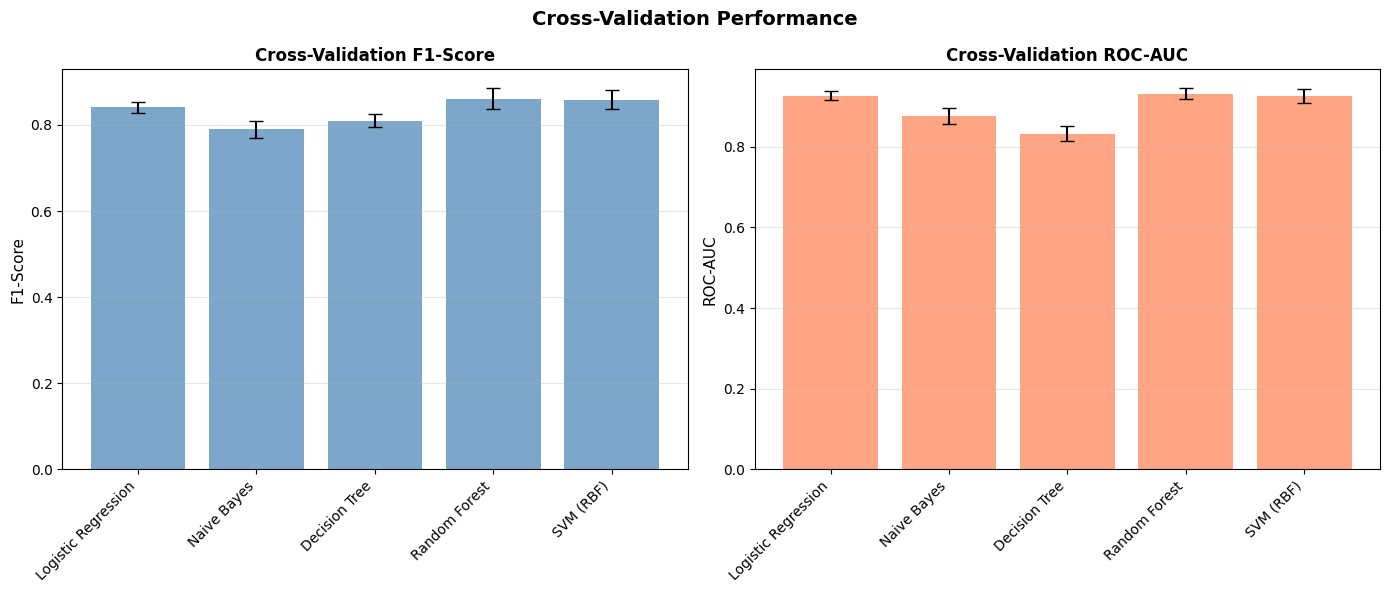

✓ CV comparison saved
✓ VISUALIZATIONS COMPLETED


In [62]:
# ============================================================================
# COMPREHENSIVE VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 100)
print(" " * 20 + "PHASE 9: COMPREHENSIVE VISUALIZATIONS")
print("=" * 100)

# 9.1: ROC Curves
print("\n9.1: GENERATING ROC CURVES")
print("-" * 100)

plt.figure(figsize=(12, 8))

for model_name, results in all_results_combined.items():
    y_pred_proba = results['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test_fe, y_pred_proba)
    roc_auc = roc_auc_score(y_test_fe, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC={roc_auc:.3f})', linewidth=2.5)

plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC=0.500)', linewidth=2)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(OUT_DIR_fig, 'roc_curves_comparison.png'), dpi=300, bbox_inches='tight')
plt.close()

print("✓ ROC curves saved")

# 9.2: Metrics Comparison Bar Charts
print("\n9.2: GENERATING METRICS COMPARISON CHARTS")
print("-" * 100)

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Model Evaluation Metrics Comparison', fontsize=16, fontweight='bold', y=1.00)

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Sensitivity']
colors = ['steelblue', 'coral', 'lightgreen', 'skyblue', 'gold', 'plum']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 3, idx % 3]
    sorted_table = results_table.sort_values(metric, ascending=True)
    
    bars = ax.barh(sorted_table['Model'], sorted_table[metric], color=colors[idx])
    ax.set_xlim([0, 1])
    ax.set_xlabel('Score', fontsize=11)
    ax.set_title(metric, fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    for i, v in enumerate(sorted_table[metric]):
        ax.text(v + 0.02, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()
plt.savefig(os.path.join(OUT_DIR_fig, 'metrics_comparison.png'), dpi=300, bbox_inches='tight')
plt.close()

print("✓ Metrics comparison saved")

# 9.3: Cross-Validation Comparison
print("\n9.3: GENERATING CROSS-VALIDATION COMPARISON")
print("-" * 100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Cross-Validation Performance', fontsize=14, fontweight='bold')

cv_models = list(cv_results.keys())
cv_f1_means = [cv_results[m]['f1_mean'] for m in cv_models]
cv_f1_stds = [cv_results[m]['f1_std'] for m in cv_models]
cv_auc_means = [cv_results[m]['auc_mean'] for m in cv_models]
cv_auc_stds = [cv_results[m]['auc_std'] for m in cv_models]

x_pos = np.arange(len(cv_models))
ax1.bar(x_pos, cv_f1_means, yerr=cv_f1_stds, capsize=5, color='steelblue', alpha=0.7)
ax1.set_ylabel('F1-Score', fontsize=11)
ax1.set_title('Cross-Validation F1-Score', fontsize=12, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(cv_models, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3)

ax2.bar(x_pos, cv_auc_means, yerr=cv_auc_stds, capsize=5, color='coral', alpha=0.7)
ax2.set_ylabel('ROC-AUC', fontsize=11)
ax2.set_title('Cross-Validation ROC-AUC', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(cv_models, rotation=45, ha='right')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()
plt.savefig(os.path.join(OUT_DIR_fig, 'cv_comparison.png'), dpi=300, bbox_inches='tight')
plt.close()

print("✓ CV comparison saved\n✓ VISUALIZATIONS COMPLETED")

## FINAL MODEL SELECTION & REPORT

In [63]:
# ============================================================================
# FINAL MODEL SELECTION & TECHNICAL REPORT
# ============================================================================

print("\n" + "=" * 100)
print(" " * 20 + "FINAL MODEL SELECTION")
print("=" * 100)

best_model_info = results_table.iloc[0]

print(f"\n{'=' * 100}")
print(f"🏆 BEST MODEL: {best_model_name.upper()}")
print(f"{'=' * 100}")

print(f"\nTest Set Performance:")
print(f"  Accuracy:       {best_model_info['Accuracy']:.4f}")
print(f"  Precision:      {best_model_info['Precision']:.4f}")
print(f"  Recall:         {best_model_info['Recall']:.4f}")
print(f"  F1-Score:       {best_model_info['F1-Score']:.4f} ⭐")
print(f"  ROC-AUC:        {best_model_info['ROC-AUC']:.4f}")
print(f"  Sensitivity:    {best_model_info['Sensitivity']:.4f}")
print(f"  Specificity:    {best_model_info['Specificity']:.4f}")

print(f"\nCross-Validation:")
print(f"  CV F1-Score:    {best_model_info['CV_F1_Mean']:.4f} (±{cv_results[best_model_name]['f1_std']:.4f})")
print(f"  CV ROC-AUC:     {best_model_info['CV_AUC_Mean']:.4f} (±{cv_results[best_model_name]['auc_std']:.4f})")

# Save feature importance
feature_importance.to_csv(os.path.join(OUT_DIR_met, 'feature_importance.csv'), index=False)
results_table.to_csv(os.path.join(OUT_DIR_met, 'model_comparison_summary.csv'), index=False)

print(f"\n✓ All results saved to: {OUT_DIR_met}")
print(f"✓ Feature importance: feature_importance.csv")
print(f"✓ Model comparison: model_comparison_summary.csv")

# Final Summary
print("\n" + "=" * 100)
print(" " * 30 + "PIPELINE EXECUTION SUMMARY")
print("=" * 100)

print(f"""
✓ Feature Engineering
  - 8 categorical features one-hot encoded
  - 3 numerical features log-transformed
  - 2 interaction features created
  - Dataset shape: {X_train_fe.shape[1]} features

✓ Models Trained: 5
  - Logistic Regression
  - Naive Bayes
  - Decision Tree
  - Random Forest
  - SVM (RBF)

✓ Cross-Validation: 5-fold stratified

✓ Hyperparameter Tuning: 2 models
  - Random Forest (GridSearchCV)
  - Logistic Regression (GridSearchCV)

✓ Feature Importance Analysis
  - Tree-based importance
  - Permutation importance

✓ Visualizations Generated: 7 plots
  - ROC curves
  - Metrics comparison
  - CV comparison
  - Confusion matrix
  - Feature importance plots

🏆 BEST MODEL: {best_model_name}
   F1-Score: {best_model_info['F1-Score']:.4f}
   ROC-AUC: {best_model_info['ROC-AUC']:.4f}

✓ COMPLETE ML PIPELINE IMPLEMENTED ✓
""")

print("=" * 100)


                    FINAL MODEL SELECTION

🏆 BEST MODEL: RANDOM FOREST

Test Set Performance:
  Accuracy:       0.8478
  Precision:      0.8532
  Recall:         0.8478
  F1-Score:       0.8483 ⭐
  ROC-AUC:        0.9269
  Sensitivity:    0.8852
  Specificity:    0.8182

Cross-Validation:
  CV F1-Score:    0.8610 (±0.0240)
  CV ROC-AUC:     0.9322 (±0.0127)

✓ All results saved to: ../outputs/metrics
✓ Feature importance: feature_importance.csv
✓ Model comparison: model_comparison_summary.csv

                              PIPELINE EXECUTION SUMMARY

✓ Feature Engineering
  - 8 categorical features one-hot encoded
  - 3 numerical features log-transformed
  - 2 interaction features created
  - Dataset shape: 37 features

✓ Models Trained: 5
  - Logistic Regression
  - Naive Bayes
  - Decision Tree
  - Random Forest
  - SVM (RBF)

✓ Cross-Validation: 5-fold stratified

✓ Hyperparameter Tuning: 2 models
  - Random Forest (GridSearchCV)
  - Logistic Regression (GridSearchCV)

✓ Feature Im